# Python-APIs - What's the Weather Like?

### Analysis:
    
**Observed trend 1** - From the latitude Vs temperature plot, we can deduce 
that the temperature increases at it reaches 0 degree at the equator and 
decreases in either direction (north or south). However, lesser towards the south pole.

**Observed trend 2** - From the latitude Vs wind speed plot, we can deduce 
that the wind speed is more towards the negative latitude(south pole).

**Observed trend 3** - From the latitude Vs cloudiness plot, we can deduce 
that the change in latitude and cloudiness are not related.

In [2]:
import random
import requests
import time

import pandas as pd
import openweathermapy as owm
import matplotlib.pyplot as plt
import seaborn as sns

from citipy import citipy
from datetime import datetime
from pprint import pprint
from config import api_key
from config import gkey

In [3]:
###Step1: Generating a list of tuples of coordinates using random.uniform \
#       (not randon.randint)

#Initializing Coordinates' list
Coordinates = []

#Creating tuples of lat & long using random.uniform & appending to the list
for i in range(600):
    lat,long = round(random.uniform(-90,90),2),round(random.uniform(-180,180),2)
    Coordinates.append((lat,long))

#Display a few coordinates
Coordinates[0:4]

[(0.21, 29.73), (-81.5, 44.63), (77.18, 24.93), (50.33, -120.29)]

In [4]:
###Step 2:Randomly select at least 500 unique (non-repeat) cities 
#based on latitude and longitude.Using "citipy" module

#Initializing Cities' list to hold the object returned from citipy
Cities = []

#Getting nearest cities using "citipy" using latitudes & longitudes
for coordinate_pairs in Coordinates:
    lati,longi = coordinate_pairs
    Cities.append(citipy.nearest_city(lati,longi)) 

#Initializing the city_names' list to hold the city names
Nearest_City_names = []
Countries_names = []

#Generate Cities List
for city in Cities:
    Nearest_City_names.append(city.city_name.title())   
    Countries_names.append(city.country_code.upper())

#Display a few city names
print(Nearest_City_names[0:4])
print(Countries_names[0:4])

['Kasese', 'Port Alfred', 'Havoysund', 'Kamloops']
['UG', 'ZA', 'NO', 'CA']


In [5]:
###Step3:Perform a weather check on each of the cities using a series of 
#successive API calls.

base_url = "https://api.openweathermap.org/data/2.5/weather?appid="
Weather_data = []
record_count = 0
for city in Nearest_City_names:
    target_url = base_url + api_key + "&q=" + city + "&units=imperial"
    # Log the url, record, and city
    if record_count == 0: 
        print("-----------------------------")
        print("Beginning Data Retrieval")
        print("-----------------------------")
    print("Processing Record %s of City list for city | %s" % (record_count, city))
    print(target_url)
    response = requests.get(target_url)
    try:
        data = response.json()
        Weather_data.append(data)
        record_count = record_count + 1
    except KeyError:
        next        
print("----------------------------- ")
print("Data Retrieval Complete   ")
print("----------------------------- ")

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 0 of City list for city | Kasese
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Kasese&units=imperial
Processing Record 1 of City list for city | Port Alfred
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Port Alfred&units=imperial
Processing Record 2 of City list for city | Havoysund
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Havoysund&units=imperial
Processing Record 3 of City list for city | Kamloops
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Kamloops&units=imperial
Processing Record 4 of City list for city | Nizhniy Ingash
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Nizhniy Ingash&units=imperial
Processing Record 5 of City list for city | Port Elizabeth
https://ap

Processing Record 49 of City list for city | North Bend
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=North Bend&units=imperial
Processing Record 50 of City list for city | Ilulissat
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Ilulissat&units=imperial
Processing Record 51 of City list for city | Kapaa
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Kapaa&units=imperial
Processing Record 52 of City list for city | Jamestown
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Jamestown&units=imperial
Processing Record 53 of City list for city | Puerto Ayora
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Puerto Ayora&units=imperial
Processing Record 54 of City list for city | Rio Grande
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Rio Grande

Processing Record 98 of City list for city | Inuvik
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Inuvik&units=imperial
Processing Record 99 of City list for city | Bengkulu
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Bengkulu&units=imperial
Processing Record 100 of City list for city | Ushuaia
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Ushuaia&units=imperial
Processing Record 101 of City list for city | Busselton
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Busselton&units=imperial
Processing Record 102 of City list for city | Port Macquarie
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Port Macquarie&units=imperial
Processing Record 103 of City list for city | Kapaa
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Kapaa&units=i

Processing Record 148 of City list for city | Vaitupu
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Vaitupu&units=imperial
Processing Record 149 of City list for city | Jamestown
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Jamestown&units=imperial
Processing Record 150 of City list for city | Sao Filipe
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Sao Filipe&units=imperial
Processing Record 151 of City list for city | Busselton
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Busselton&units=imperial
Processing Record 152 of City list for city | Mataura
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Mataura&units=imperial
Processing Record 153 of City list for city | Mauriti
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Mauriti&units

Processing Record 198 of City list for city | Camopi
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Camopi&units=imperial
Processing Record 199 of City list for city | Pevek
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Pevek&units=imperial
Processing Record 200 of City list for city | Mataura
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Mataura&units=imperial
Processing Record 201 of City list for city | Salinopolis
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Salinopolis&units=imperial
Processing Record 202 of City list for city | Krivosheino
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Krivosheino&units=imperial
Processing Record 203 of City list for city | Bubaque
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Bubaque&units=imp

Processing Record 248 of City list for city | Wiang Sa
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Wiang Sa&units=imperial
Processing Record 249 of City list for city | Saldanha
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Saldanha&units=imperial
Processing Record 250 of City list for city | Shahr-E Babak
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Shahr-E Babak&units=imperial
Processing Record 251 of City list for city | Trairi
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Trairi&units=imperial
Processing Record 252 of City list for city | Saint George
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Saint George&units=imperial
Processing Record 253 of City list for city | Vieux-Habitants
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9

Processing Record 297 of City list for city | Leningradskiy
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Leningradskiy&units=imperial
Processing Record 298 of City list for city | Yuzhne
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Yuzhne&units=imperial
Processing Record 299 of City list for city | New Norfolk
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=New Norfolk&units=imperial
Processing Record 300 of City list for city | Mana
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Mana&units=imperial
Processing Record 301 of City list for city | Kautokeino
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Kautokeino&units=imperial
Processing Record 302 of City list for city | Lebu
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Lebu&units=i

Processing Record 346 of City list for city | Umm Durman
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Umm Durman&units=imperial
Processing Record 347 of City list for city | Xucheng
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Xucheng&units=imperial
Processing Record 348 of City list for city | Port Elizabeth
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Port Elizabeth&units=imperial
Processing Record 349 of City list for city | Khorixas
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Khorixas&units=imperial
Processing Record 350 of City list for city | Khandbari
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Khandbari&units=imperial
Processing Record 351 of City list for city | Busselton
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q

Processing Record 396 of City list for city | Codrington
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Codrington&units=imperial
Processing Record 397 of City list for city | Amzya
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Amzya&units=imperial
Processing Record 398 of City list for city | Klaksvik
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Klaksvik&units=imperial
Processing Record 399 of City list for city | Butaritari
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Butaritari&units=imperial
Processing Record 400 of City list for city | Kapaa
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Kapaa&units=imperial
Processing Record 401 of City list for city | Atuona
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Atuona&units=imperial


Processing Record 446 of City list for city | Rikitea
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Rikitea&units=imperial
Processing Record 447 of City list for city | Vaini
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Vaini&units=imperial
Processing Record 448 of City list for city | Hilo
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Hilo&units=imperial
Processing Record 449 of City list for city | Plainview
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Plainview&units=imperial
Processing Record 450 of City list for city | Chitipa
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Chitipa&units=imperial
Processing Record 451 of City list for city | Mataura
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Mataura&units=imperial
Processing

Processing Record 495 of City list for city | Yellowknife
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Yellowknife&units=imperial
Processing Record 496 of City list for city | Mataura
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Mataura&units=imperial
Processing Record 497 of City list for city | Sao Joao Da Barra
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Sao Joao Da Barra&units=imperial
Processing Record 498 of City list for city | Ushuaia
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Ushuaia&units=imperial
Processing Record 499 of City list for city | Umzimvubu
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Umzimvubu&units=imperial
Processing Record 500 of City list for city | Komsomolskiy
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0

Processing Record 543 of City list for city | Te Anau
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Te Anau&units=imperial
Processing Record 544 of City list for city | Lavrentiya
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Lavrentiya&units=imperial
Processing Record 545 of City list for city | Shimoda
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Shimoda&units=imperial
Processing Record 546 of City list for city | Khatanga
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Khatanga&units=imperial
Processing Record 547 of City list for city | Longyearbyen
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Longyearbyen&units=imperial
Processing Record 548 of City list for city | Angoram
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Angoram&u

Processing Record 591 of City list for city | Sentyabrskiy
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Sentyabrskiy&units=imperial
Processing Record 592 of City list for city | Svetlyy Yar
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Svetlyy Yar&units=imperial
Processing Record 593 of City list for city | Hithadhoo
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Hithadhoo&units=imperial
Processing Record 594 of City list for city | Otradnoye
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Otradnoye&units=imperial
Processing Record 595 of City list for city | Puerto Ayora
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Puerto Ayora&units=imperial
Processing Record 596 of City list for city | Dobreni
https://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b

In [6]:
lat = []
lon = []
temp = []
hum = []
winds = []
cloud =[]
city =[]
country = []

for item in Weather_data:
    try:
        lat.append(item["coord"]["lat"])
        lon.append(item["coord"]["lat"])
        temp.append(item["main"]["temp"])
        hum.append(item["main"]["humidity"])
        winds.append(item["wind"]["speed"])
        cloud.append(item["clouds"]["all"])
        city.append(item["name"])
        country.append(item["sys"]["country"])
    except:
        next 

In [7]:
Weather_Dataframe = pd.DataFrame({"City": city,"Country":country,                                  
                                  "Longitude (Degrees)":lon,
                                  "Latitude (Degrees)":lat,
                                  "Maximum Temperature (F)":temp,
                                  "Humidity (%)":hum,
                                  "Wind Speed (MPH)":winds,
                                  "Cloudiness (%)":cloud})                                       

In [8]:
Weather_Dataframe = Weather_Dataframe [["City","Country","Longitude (Degrees)","Latitude (Degrees)","Maximum Temperature (F)",
                "Humidity (%)","Wind Speed (MPH)","Cloudiness (%)"]]

In [9]:
Weather_Dataframe.head()

,City,Country,Longitude (Degrees),Latitude (Degrees),Maximum Temperature (F),Humidity (%),Wind Speed (MPH),Cloudiness (%)
0,Kasese,UG,0.17,0.17,62.22,100,2.77,44
1,Port Alfred,ZA,-33.59,-33.59,59.88,85,11.83,0
2,Havoysund,NO,71.00,71.00,44.60,100,2.24,75
3,Kamloops,CA,50.68,50.68,69.80,68,8.05,90
4,Nizhniy Ingash,RU,56.20,56.20,61.59,98,5.28,80


In [10]:
Weather_Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 8 columns):
City                       547 non-null object
Country                    547 non-null object
Longitude (Degrees)        547 non-null float64
Latitude (Degrees)         547 non-null float64
Maximum Temperature (F)    547 non-null float64
Humidity (%)               547 non-null int64
Wind Speed (MPH)           547 non-null float64
Cloudiness (%)             547 non-null int64
dtypes: float64(4), int64(2), object(2)
memory usage: 34.3+ KB


In [20]:
Weather_Dataframe.to_csv("MyOutputFiles/Weather1.csv",header=True)

**Objective - To build a series of scatter plots to showcase the following relationships:**
Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude

Temperature vs. Latitude Plot

In [12]:
x = Weather_Dataframe["Latitude (Degrees)"]
y1 = Weather_Dataframe["Maximum Temperature (F)"]

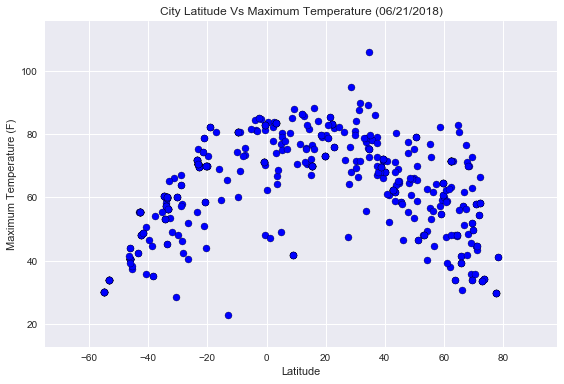

In [13]:
plt.scatter(Weather_Dataframe["Latitude (Degrees)"],Weather_Dataframe["Maximum Temperature (F)"],
           facecolor="b",edgecolor="black")
plt.xlim(x.min()-20,x.max()+20)
plt.ylim(y1.min()-10,y1.max()+10)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title(f"City Latitude Vs Maximum Temperature ({datetime.now().strftime('%m/%d/%Y')})")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.tight_layout()
plt.savefig("MyImages/Temperature(F) vs. Latitude1.png")
plt.show()

Humidity(%) vs. Latitude Plot

In [14]:
y2 = Weather_Dataframe["Humidity (%)"]

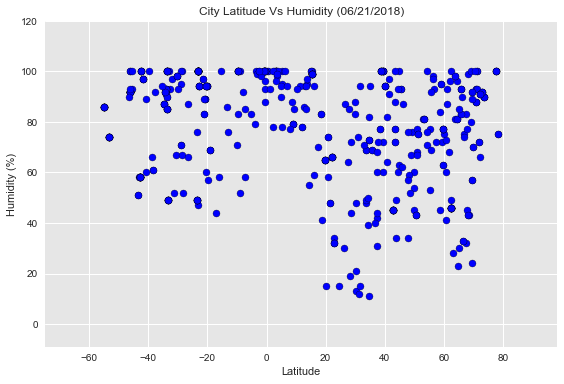

In [15]:
plt.scatter(Weather_Dataframe["Latitude (Degrees)"],Weather_Dataframe["Humidity (%)"],
           facecolor="b",edgecolor="black")
plt.xlim(x.min()-20,x.max()+20)
plt.ylim(y2.min()-20,y2.max()+20)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude Vs Humidity ({datetime.now().strftime('%m/%d/%Y')})")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.tight_layout()
plt.savefig("MyImages/Humidity(%) vs. Latitude1.png")
plt.show()

Wind Speed(mph) vs. Latitude Plot

In [16]:
y3 = Weather_Dataframe["Wind Speed (MPH)"]

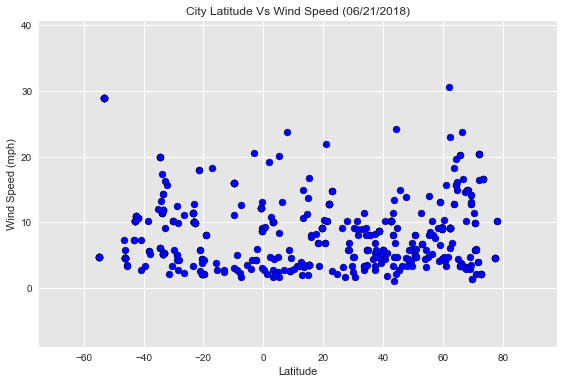

In [17]:
plt.scatter(Weather_Dataframe["Latitude (Degrees)"],Weather_Dataframe["Wind Speed (MPH)"],
           facecolor="b",edgecolor="black")
plt.xlim(x.min()-20,x.max()+20)
plt.ylim(y3.min()-10,y3.max()+10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude Vs Wind Speed ({datetime.now().strftime('%m/%d/%Y')})")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.tight_layout()
plt.savefig("MyImages/Wind Speed(MPH) vs. Latitude1.png")
plt.show()

Cloudiness(%) vs. Latitude Plot

In [18]:
y4 = Weather_Dataframe["Cloudiness (%)"]

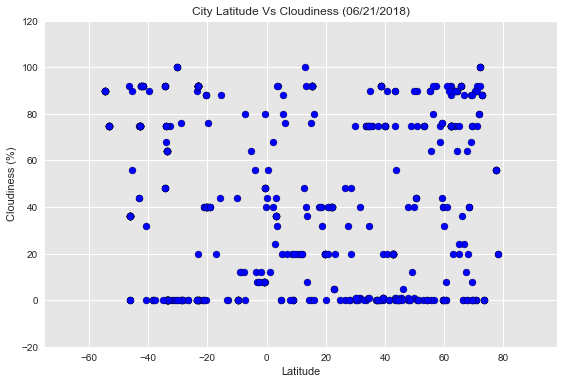

In [19]:

plt.scatter(Weather_Dataframe["Latitude (Degrees)"],Weather_Dataframe["Cloudiness (%)"],
           facecolor="b",edgecolor="black")
plt.xlim(x.min()-20,x.max()+20)
plt.ylim(y4.min()-20,y4.max()+20)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude Vs Cloudiness ({datetime.now().strftime('%m/%d/%Y')})")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.tight_layout()
plt.savefig("MyImages/Cloudiness(%) vs. Latitude1.png")
plt.show()